In [14]:
import matplotlib.pyplot as plt
import os

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

import shutil

work_dir_pth = './Work_dirs/work_dirs_external/infrared'
for train_sesh in os.listdir(work_dir_pth):
    #print(train_sesh ,os.path.isdir(  ))
    
    train_logs = os.listdir( os.path.join(work_dir_pth, train_sesh ))
    
    if ('model_best.pth.tar' not in train_logs) and (len(train_logs) < 4) :
        print(train_sesh)
        print(len(train_logs))
        
        shutil.rmtree(os.path.join(work_dir_pth, train_sesh ))

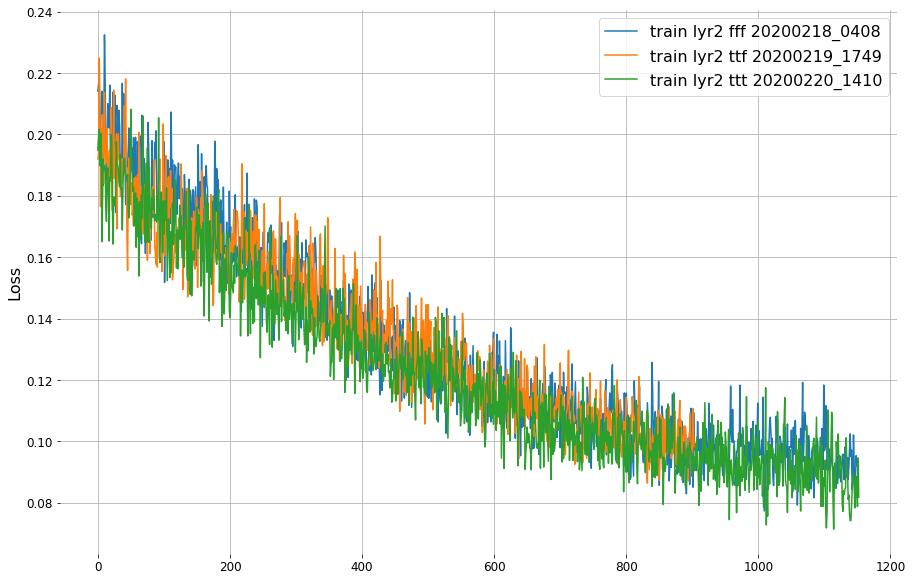

In [39]:
root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'rgb'

time_stamps = ['20200215_1046', '20200215_0518','20200216_1938', '20200214_1620','20200214_2057', '20200214_1621']
lrs = ['0.001','0.0005' ,' 0.0001', '0.00005', '0.00003','0.00001' ]

#img_type = 'infrared'
#time_stamps = ['20200215_1058','20200216_2009', '20200216_1933', '20200216_1956','20200216_1936', '20200216_1932','20200215_1059']
#lrs = ['0.0005','0.00025', '0.0001', '7.5e-05', '5e-05' , '1e-05','5e-06']



img_type = 'ensemble'
#time_stamps = ['20200217_2021', '20200217_2312', '20200217_2351','20200217_1624','20200217_2055','20200217_1747']
#lrs = ['0.0005', '0.0001','0.000075','0.00005','0.00001','0.000005']
time_stamps = ['20200218_0408', '20200219_1749']
lrs = ['fff', 'ttf']


        
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
    
    if len(train_loss) > 200:
        ax.plot( train_loss[50:], label='train lyr2 ' + lrs[i] + ' ' + time_stamp)
    else:
        ax.plot( train_loss, label='train lyr2 ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    

work_dir = root_work_dir+ img_type +'/' 
with open( os.path.join(work_dir + '20200219_1221', 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss1 = list(map(float,  f.readlines()[0].split() )) 
with open( os.path.join(work_dir + '20200220_1410', 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss2 = list(map(float,  f.readlines()[0].split() ))
train_loss = [*train_loss1, *train_loss2]

ax.plot( train_loss[50:], label='train lyr2 ' + 'ttt' + ' 20200220_1410')
    
    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.07,0.12))
ax.grid()